#### SVC on [hand-written digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
* compare different kernels

In [1]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module6/Datasets/'
fname = flc + 'optdigits.tra'
train0 = pd.read_csv(fname, header = None)
fname = flc + 'optdigits.tes'
test0 = pd.read_csv(fname, header = None)

In [3]:
# separate into data & labels
Nfeature = train0.shape[1]
X_train = train0.iloc[:, :Nfeature-1]
Y_train = train0.iloc[:, Nfeature-1:].values.ravel()
X_test = test0.iloc[:, :Nfeature-1]
Y_test = test0.iloc[:, Nfeature-1:].values.ravel()

In [4]:
# reduce the training set to test the effect: every 100, keep the first 4
Nsample = X_train.shape[0]
Nblock = Nsample // 100
Nblock = Nblock+1 if Nsample%100 > 0 else Nblock
for iblock in range(Nblock):
    i1 = iblock*100
    i2 = i1+4
    train2 = X_train.iloc[i1:i2,:]
    label2 = Y_train[i1:i2]
    if iblock == 0:
        X_train2, Y_train2 = train2, label2
    else:
        X_train2 = pd.concat([X_train2, train2], axis = 0)
        Y_train2 = np.r_[Y_train2, label2]

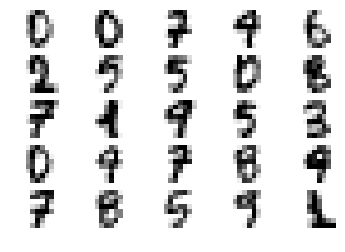

In [5]:
# show some plots as example
plt.figure()
cnt = 0
for col in range(5):
    for row in range(5):
        plt.subplot(5,5,cnt+1)
        plt.imshow(X_train.iloc[cnt,:].values.reshape(8,8), cmap=plt.cm.gray_r)
        plt.axis('off')
        cnt += 1
plt.show()

In [6]:
# SVC classifier: compare different kernel
for icase in range(3):
    if icase == 0: fkernel = 'linear'
    elif icase == 1: fkernel = 'poly'
    else: fkernel = 'rbf'
    
    svc = SVC(C = 1.0, gamma = 1e-3, kernel = 'rbf', cache_size = 200)
    svc.fit(X_train, Y_train)
    #svc.fit(X_train2, Y_train2)
    print('score: ', svc.score(X_test, Y_test))

score:  0.982749026155
score:  0.982749026155
score:  0.982749026155


In [7]:
# prediction with SVC (rbf)
svc = SVC(C = 1.0, gamma = 1e-3, kernel = 'rbf', cache_size = 200)
svc.fit(X_train, Y_train)
Y_test2 = svc.predict(X_test)

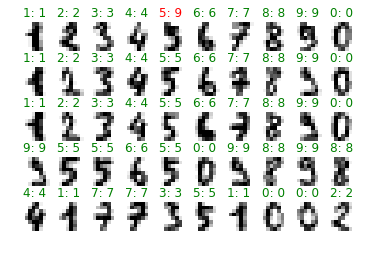

In [8]:
# visualize the prediction results
plt.figure()
cnt = 0
istart = 0
for col in range(10):
    for row in range(5):
        cnt += 1
        idc = cnt + istart
        plt.subplot(5,10,cnt)
        plt.imshow(X_test.iloc[idc,:].values.reshape(8,8), cmap=plt.cm.gray_r)
        plt.axis('off')
        
        color2 = 'g' if Y_test2[idc] == Y_test[idc] else 'r'
        fttl = str(Y_test[idc]) + ': ' + str(Y_test2[idc])
        plt.title(fttl, color = color2)
plt.show()